In [8]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

nomor 1

In [18]:
# Definisi subsistem G1 dan G2
G1 = ct.TransferFunction([1, 5], [1, 6, 4]) 
G2 = ct.TransferFunction([1], [1, 1])  
G3 = ct.TransferFunction([1], [1, 3])
H1 = G1
H2 = G2
H3 = G3
print (H1)
print (H2)
print (H3)


<TransferFunction>: sys[40]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    s + 5
-------------
s^2 + 6 s + 4

<TransferFunction>: sys[41]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 1

<TransferFunction>: sys[42]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 3



In [23]:
# Interkoneksi serial
sys_serial = ct.series(G1, G2)
print("Interkoneksi Serial:", sys_serial)

# Interkoneksi paralel
sys_parallel = ct.parallel(G1, G2)
print("Interkoneksi Paralel:", sys_parallel)

# Interkoneksi umpan balik positif
#sys_feedback_pos = ct.feedback(G1, G2)
#print("Interkoneksi Umpan Balik Positif:", sys_feedback_pos)

# Interkoneksi umpan balik negatif
sys_feedback_neg = ct.feedback(sys_serial, G3, -1)
print("Interkoneksi Umpan Balik Negatif:", sys_feedback_neg)

Interkoneksi Serial: <TransferFunction>: sys[65]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        s + 5
----------------------
s^3 + 7 s^2 + 10 s + 4

Interkoneksi Paralel: <TransferFunction>: sys[66]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2 s^2 + 12 s + 9
----------------------
s^3 + 7 s^2 + 10 s + 4

Interkoneksi Umpan Balik Negatif: <TransferFunction>: sys[67]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         s^2 + 8 s + 15
---------------------------------
s^4 + 10 s^3 + 31 s^2 + 35 s + 17



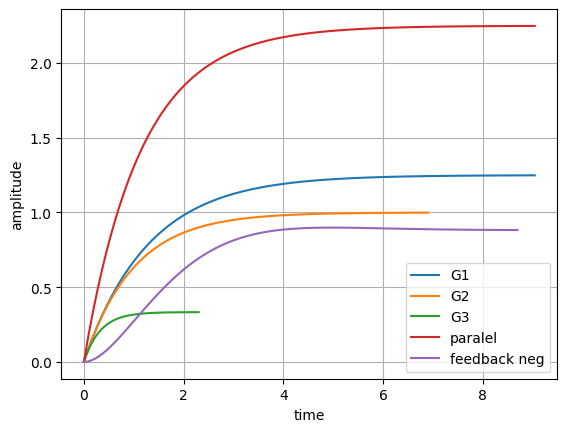

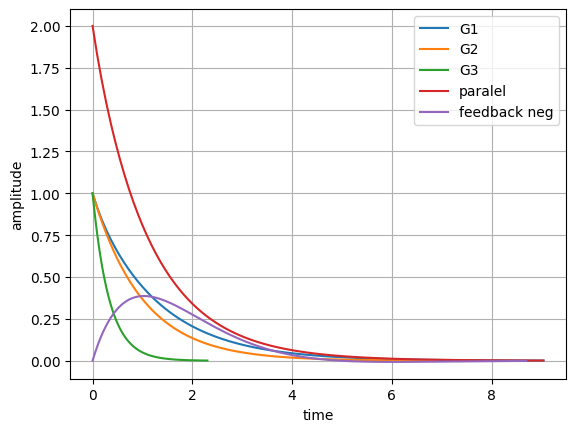

In [29]:
#STEP RESPONSE
t1, y1 = ct.step_response(G1)
t2, y2 = ct.step_response(G2)
t3, y3 = ct.step_response(G3)
t4, y4 = ct.step_response(sys_parallel)
t5, y5 = ct.step_response(sys_feedback_neg)

plt.plot(t1, y1, label = "G1")
plt.plot(t2, y2, label = "G2")
plt.plot(t3, y3, label = "G3")
plt.plot(t4, y4, label = "paralel")
plt.plot(t5, y5, label = "feedback neg")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid()
plt.show()

#IMPULSE RESPONSE
t1, y1 = ct.impulse_response(G1)
t2, y2 = ct.impulse_response(G2)
t3, y3 = ct.impulse_response(G3)
t4, y4 = ct.impulse_response(sys_parallel)
t5, y5 = ct.impulse_response(sys_feedback_neg)

plt.plot(t1, y1, label = "G1")
plt.plot(t2, y2, label = "G2")
plt.plot(t3, y3, label = "G3")
plt.plot(t4, y4, label = "paralel")
plt.plot(t5, y5, label = "feedback neg")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid()
plt.show()


NOMOR 2

In [31]:
t = [2, 4, 6, 8]
H = {}

for i in t:
    tf= ct.TransferFunction([1], [i, 1])
    H[i] = tf
    print(tf)

<TransferFunction>: sys[103]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
2 s + 1

<TransferFunction>: sys[104]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
4 s + 1

<TransferFunction>: sys[105]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
6 s + 1

<TransferFunction>: sys[106]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1
-------
8 s + 1



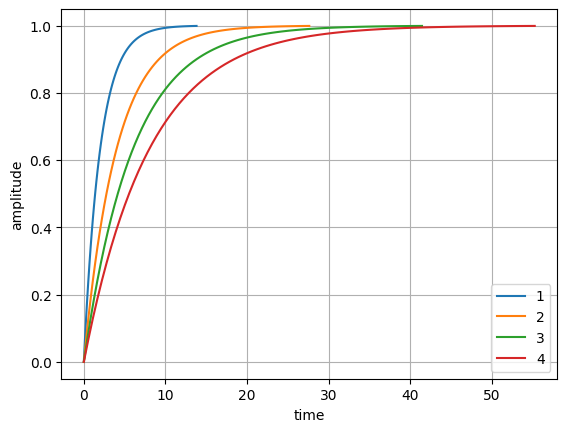

In [ ]:
t, y_impulse = ct.step_response(H[sys])
    plt.plot(t, y_impulse, label = f"{i+1}")for i, sys in enumerate(H):
    

plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid()
plt.show()

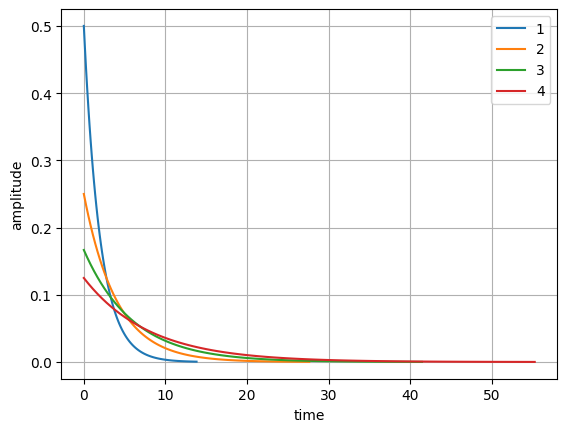

In [35]:
for i,sys in enumerate(H):
    t, y_impulse = ct.impulse_response(H[sys])
    plt.plot(t, y_impulse, label = f"{i+1}")

plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.grid()
plt.show()

In [38]:
for i,sys in enumerate(H):
    data = ct.step_info(H[sys])
    print (data)

{'RiseTime': np.float64(4.326068962594873), 'SettlingTime': np.float64(7.954384866706703), 'SettlingMin': np.float64(0.9), 'SettlingMax': np.float64(1.0), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.9989999999999999), 'PeakTime': np.float64(13.815510557964274), 'SteadyStateValue': np.float64(1.0)}
{'RiseTime': np.float64(8.652137925189747), 'SettlingTime': np.float64(15.908769733413406), 'SettlingMin': np.float64(0.9), 'SettlingMax': np.float64(1.0), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.9989999999999999), 'PeakTime': np.float64(27.631021115928547), 'SteadyStateValue': np.float64(1.0)}
{'RiseTime': np.float64(13.396858722874446), 'SettlingTime': np.float64(23.863154600120108), 'SettlingMin': np.float64(0.9067396653116777), 'SettlingMax': np.float64(1.0), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.9989999999999994), 'PeakTime': np.float64(41.44653167389282), 'SteadyStateValue': np.float64(1.0)}
{'RiseTime': np.float64(17.304275850379494), 'SettlingTi

c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


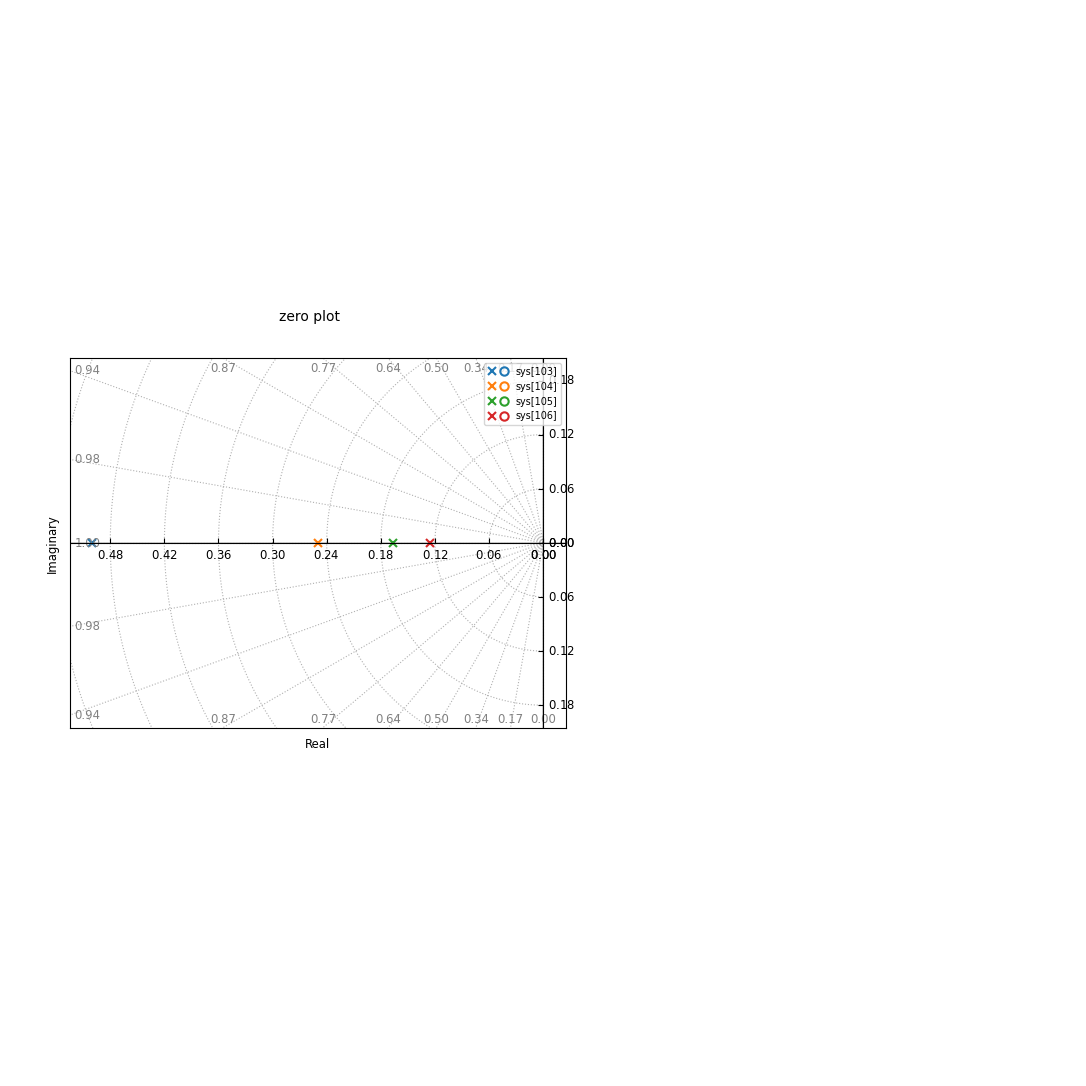

In [43]:
for i, sys in enumerate(H):
    ct.pole_zero_plot(H[sys], title = "zero plot", grid=True)

NOMOR 3

<TransferFunction>: sys[241]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      12
--------------
s^2 + 4 s + 20

<TransferFunction>: sys[244]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      48
--------------
s^2 + 8 s + 80

<TransferFunction>: sys[247]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      108
----------------
s^2 + 12 s + 180

<TransferFunction>: sys[250]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      192
----------------
s^2 + 16 s + 320



c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\statesp.py:2170: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)


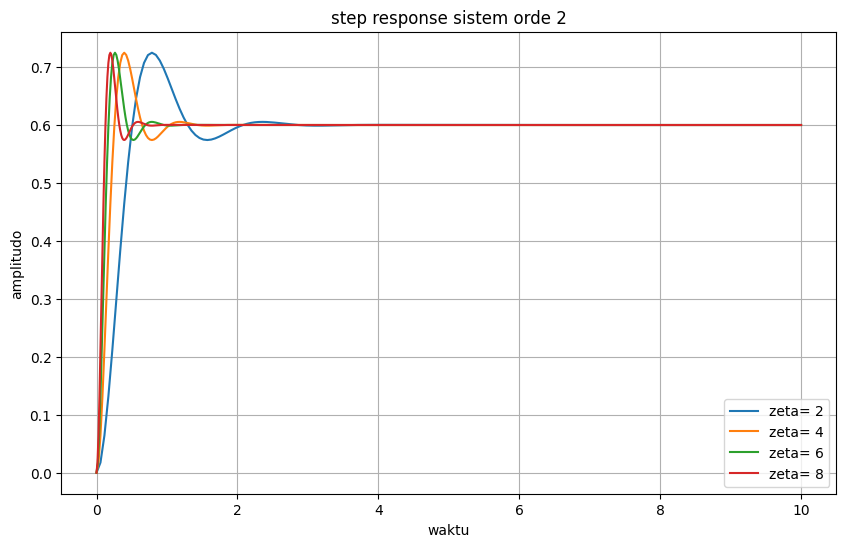

In [38]:
wn = np.sqrt(-1 +0j) #natural freq
zeta_val = [2, 4, 6, 8]
Hs = {}

plt.figure(figsize=(10, 6))
for i in zeta_val :
    num2 = np.abs([i**2 + (wn*2*i)**2])
    den2 = [1, 2*i, i**2 - 4*wn**2*i**2] #[1, 2*i, i**2 + (2*i)**2]
    Hs[i]= ct.TransferFunction(num2, den2)
    print(Hs[i])
    t, y = ct.step_response(Hs[i], T = 10) 
    plt.plot(t, y, label = f"zeta= {i}")

plt.title("step response sistem orde 2")
plt.xlabel("waktu")
plt.ylabel("amplitudo")
plt.legend()
plt.grid()
plt.show()



c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\statesp.py:2170: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\statesp.py:2170: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)
c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to

{'RiseTime': np.float64(0.3139888763173698), 'SettlingTime': np.float64(1.883933257904219), 'SettlingMin': np.float64(0.5408253625157818), 'SettlingMax': np.float64(0.7243747534077403), 'Overshoot': np.float64(20.729125567956693), 'Undershoot': 0, 'Peak': np.float64(0.7243747534077403), 'PeakTime': np.float64(0.8024160172555007), 'SteadyStateValue': np.float64(0.6000000000000001)}
{'RiseTime': np.float64(0.1569944381586849), 'SettlingTime': np.float64(0.9419666289521095), 'SettlingMin': np.float64(0.5408253625157815), 'SettlingMax': np.float64(0.7243747534077399), 'Overshoot': np.float64(20.729125567956636), 'Undershoot': 0, 'Peak': np.float64(0.7243747534077399), 'PeakTime': np.float64(0.40120800862775036), 'SteadyStateValue': np.float64(0.6000000000000001)}
{'RiseTime': np.float64(0.10466295877245663), 'SettlingTime': np.float64(0.6279777526347396), 'SettlingMin': np.float64(0.5408253625157803), 'SettlingMax': np.float64(0.7243747534077389), 'Overshoot': np.float64(20.729125567956494

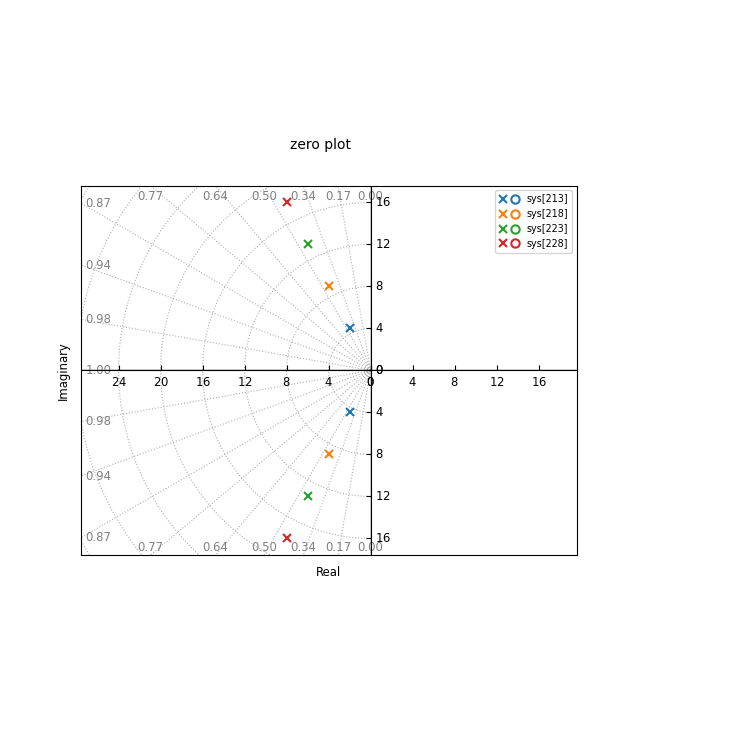

In [37]:
for i, sys1 in enumerate(Hs):
    info_order2 = ct.step_info(Hs[sys1])
    print (info_order2)
    ct.pole_zero_plot(Hs[sys1], title = "zero plot", grid=True)